<a href="https://colab.research.google.com/github/cholpon2002/CurrencyPredictionNN/blob/main/KGS_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #для хранения таблиц данных и для работы с таблицами данных
from google.colab import drive #чтобы получить доступ к файлам
import matplotlib.pyplot as plt #для графиков

# import collections 
import numpy as np 
from numpy import array
import tensorflow as tf #библиотека для написания нейронных сетей
from keras.layers import Dense, LSTM #слои
#импортируем класс (модуль слоев), для того чтобы lstm, dense робили
from sklearn.preprocessing import MinMaxScaler #для нормализации данных
import math
from keras.models import Sequential #слоистая модель 
plt.style.use('fivethirtyeight') # для красоты
drive.mount('/content/drive') #для создания папки и допуск к ней

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
df1 = pd.read_csv('./data/USD_KGS Historical Data.csv', parse_dates=['Date']) #читается с помощью Pandas
df2 = pd.read_csv('./data/KGS_RUB Historical Data.csv')

In [ ]:
df1 = df1[::-1].reset_index(drop=True)

In [ ]:
df1

,Date,Price,Open,High,Low,Vol.,Change %
0,2010-01-11,44.1190,44.1190,44.1190,44.1190,NaN,0.06%
1,2010-01-12,44.1867,44.1867,44.1867,44.1867,NaN,0.15%
2,2010-01-13,44.1916,44.1916,44.1916,44.1916,NaN,0.01%
3,2010-01-14,44.2292,44.2292,44.2292,44.2292,NaN,0.09%
4,2010-01-15,44.2350,44.2350,44.2350,44.2350,NaN,0.01%
...,...,...,...,...,...,...,...
3421,2022-12-05,84.4500,84.4771,85.2250,84.2471,NaN,0.00%
3422,2022-12-06,84.9156,84.4771,85.4578,84.2522,NaN,0.55%
3423,2022-12-07,84.9500,84.9427,85.4750,84.4849,NaN,0.04%
3424,2022-12-08,84.9491,84.9771,85.4750,84.5017,NaN,0.00%


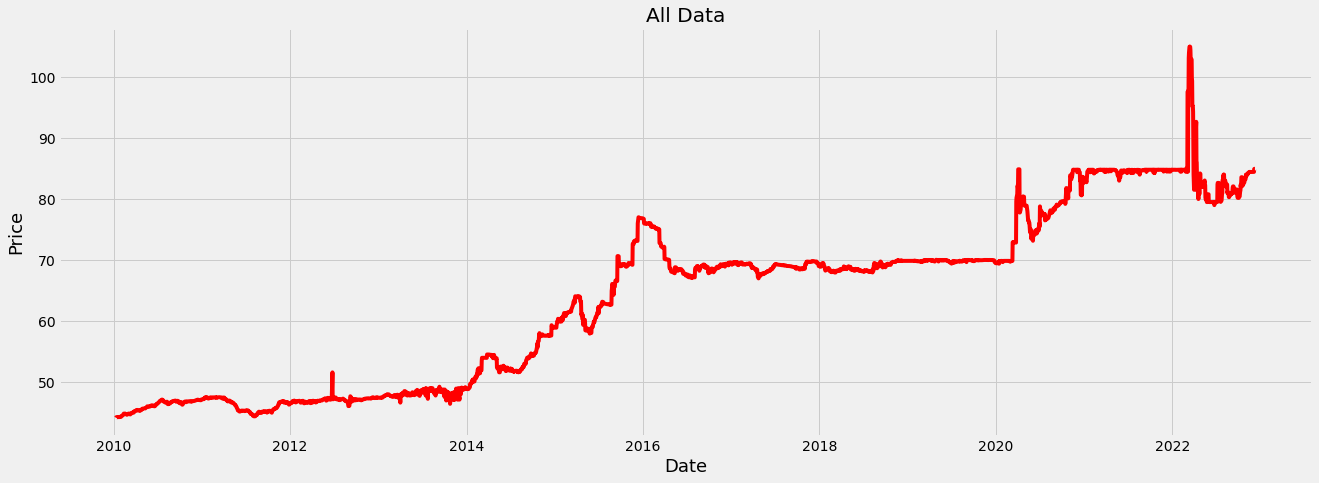

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.title('All Data')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price',fontsize = 18)
plt.plot(df1.get("Date"), df1.get("Price"), 'r-')
plt.show()

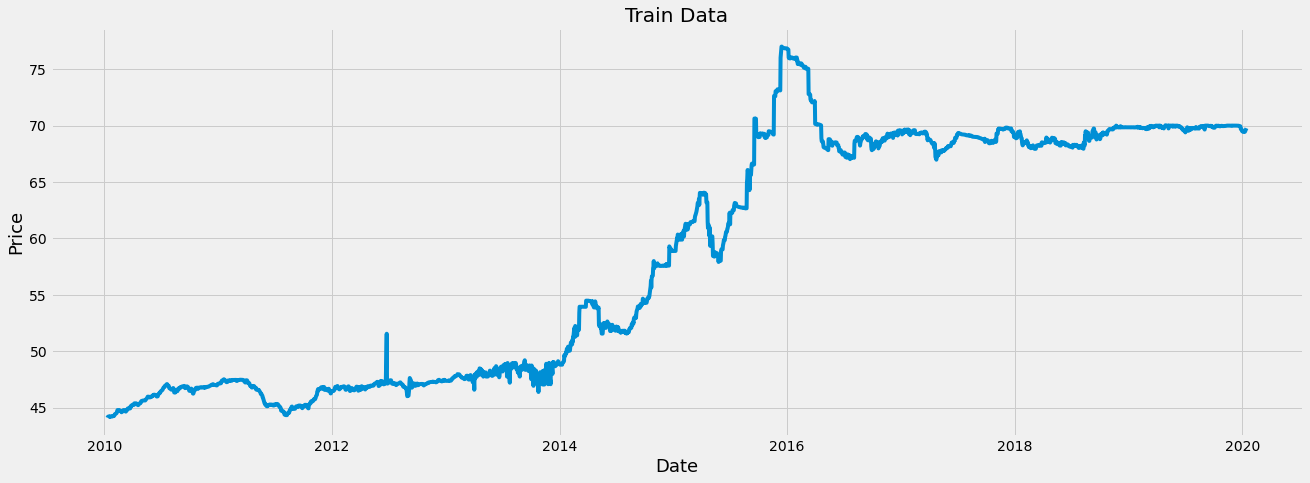

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.title('Train Data')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price',fontsize = 18)
prev_years = df1[df1["Date"]< 	"2020-01-15"	]
plt.plot(prev_years.get("Date"), prev_years.get("Price"))
plt.show()

In [ ]:
data = df1.loc[:,["Price"]] #loc - индекс, который используется чтобы тип данных остался dataframe, a не np.array, чтобы сохранить индексацию

In [ ]:
df1.loc[:,["Price"]]

,Price
0,44.1190
1,44.1867
2,44.1916
3,44.2292
4,44.2350
...,...
3421,84.4500
3422,84.9156
3423,84.9500
3424,84.9491


In [ ]:
training_data_len = math.ceil(len(data) * .8) # each row is a sample, len(data) is an amount of samples (days) multiplied to 0.8 чтобы 80% пошло на обучение 
training_data_len

2741

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1)) #normalisation
scaled_data = scaler.fit_transform(data) 

scaled_data

array([[0.        ],
       [0.00111201],
       [0.00119249],
       ...,
       [0.67066901],
       [0.67065423],
       [0.67066901]])

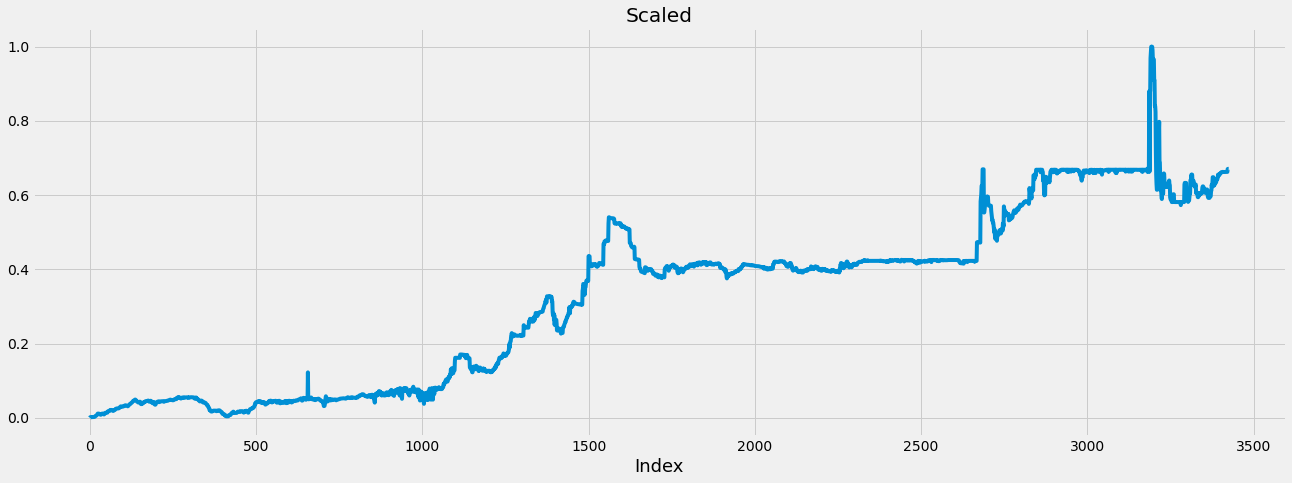

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.title('Scaled')
plt.xlabel('Index', fontsize = 18)
plt.plot(scaled_data)

In [ ]:
# Создаем датасет для обучения
train_data = scaled_data[0:training_data_len] #с 0 по 2741 (срез тренировачных данных)
# разбиваем на x underscore (независимые данные, то что получает наша нейронка) train и y underscore (зависимые данные, то что возвращается) train 
x_train = []
y_train = []

for i in range(60, len(train_data)): #60 строчек данных
    x_train.append(train_data[i-60:i]) #c i-60 индекса до i 
    y_train.append(train_data[i])

In [ ]:
#Конвертируем x_train и y_train в нумпаевский массив
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],x_train.shape[2]))

In [ ]:
#Строим нейронку
model = Sequential() #пустая модель, которая будет заполнятся слоями
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1],x_train.shape[2]))) #50 - количество нейронов в одном слое
model.add(LSTM(50,return_sequences = False)) #50 - количество нейронов в одном слое 
model.add(Dense(25))
model.add(Dense(1)) #our answer 

In [ ]:
#Компилируем модель
model.compile(optimizer='adam',loss = 'mean_squared_error') 


adam - улучшенный способ обучения (модификация градиентного спуска) но не очень понятно как работает. loss - то что нужно оптимизировать (минимизировать)

In [ ]:
#Тренируем модель
model.fit(x_train,y_train,batch_size = 1, epochs = 10)

NameError: ignored

In [ ]:
#Создаем тестовый датасет
test_data = scaled_data[training_data_len - 60:]
#по аналогии создаем x_test и y_test 
x_test = []
y_test = data[training_data_len:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i])

In [ ]:
#опять преобразуем в нумпаевский массив. Это намного быстрее и можно делать крутые штуки махинации с векторами (скалярное произведение и тд)
x_test = np.array(x_test)

In [ ]:
#опять делаем reshape, чтобы он был правильной формы, в нашем случае 60 и 1 (плюс количество тестовых samples)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[2]))

In [ ]:
x_test.shape

In [ ]:
#Получаем модель предсказывающую значения
predictions = model.predict(x_test) #просим модельку предсказать (ну, как просим - приказываем)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Получим mean squared error (RMSE) - метод наименьших квадратов. через него узнаем, насколько сильно ошибаемся
#функция ошибки
rmse =np.sqrt(np.mean((predictions-y_test)**2)) #ошибка это предсказываемые данные минус реальных, далее возводим в квадрат, после находим среднее, а потом всё под корень
rmse

In [ ]:
#Строим график
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


#Визуализируем
plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price',fontsize = 18)
plt.plot(train)
plt.plot(valid[['Price','Predictions']])
plt.legend(['Train','Actual','Predicted'], loc = 'lower right')
plt.show()

In [ ]:
valid

In [ ]:
valid["Date"] = df1.loc[training_data_len:,["Date"]]
valid

In [ ]:
train["Date"] = df1.loc[:training_data_len,["Date"]]

In [ ]:
train

In [ ]:
valid

In [ ]:

#Визуализируем
plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price',fontsize = 18)
plt.plot(train["Date"], train["Price"])
plt.plot(valid["Date"],valid[['Price','Predictions']])
plt.legend(['Train','Actual','Predicted'], loc = 'lower right')
plt.show()